In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

# 함수 매핑

* 시리즈 또는 데이터 프레임의 개별 원소를 특정 함수에 일대일 대응시키는 과정
 * 사용자가 직접 만든 함수 적용

## apply

* 시리즈 원소에 함수 매핑
 * 시리즈.apply(매핑함수) : 매핑 함수에 시리즈의 모든 원소를 하나씩 입력하고 리턴

In [ ]:
# 타이타닉의 age, fare 열 선택 후 새로운 열 ten 추가, 모든 데이터는 숫자 10
df = sns.load_dataset('titanic')[['age', 'fare']]
df['ten'] = 10
df.head(4)

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10


In [ ]:
# 임의의 객체 n에 숫자 10을 더하는 add_10(n) 사용자 함수 정의 
def add_10(n):
  return n+10
# 객체 a와 b를 더하는 add_two_obj(a, b) 함수 정의
def add_two_obj(a, b):
  return a + b

In [ ]:
print(add_10(10))
print(add_two_obj(10, 10))

20
20


In [ ]:
sr1 = df.age.apply(add_10)
sr2 = df.age.apply(add_two_obj, b=10)
sr3 = df.age.apply(lambda x: x+10)

In [ ]:
print(sr1)
print(sr2)
print(sr3)

0      32.0
1      48.0
2      36.0
3      45.0
4      45.0
       ... 
886    37.0
887    29.0
888     NaN
889    36.0
890    42.0
Name: age, Length: 891, dtype: float64
0      32.0
1      48.0
2      36.0
3      45.0
4      45.0
       ... 
886    37.0
887    29.0
888     NaN
889    36.0
890    42.0
Name: age, Length: 891, dtype: float64
0      32.0
1      48.0
2      36.0
3      45.0
4      45.0
       ... 
886    37.0
887    29.0
888     NaN
889    36.0
890    42.0
Name: age, Length: 891, dtype: float64


* 데이터 프레임 원소에 함수 매핑

In [ ]:
# df에서 age, fare 열 선택해서 add_10 함수 적용
df[['age', 'fare']].applymap(add_10)

,age,fare
0,32.0,17.2500
1,48.0,81.2833
2,36.0,17.9250
3,45.0,63.1000
4,45.0,18.0500
...,...,...
886,37.0,23.0000
887,29.0,40.0000
888,NaN,33.4500
889,36.0,40.0000


In [ ]:
df[['age', 'fare']].apply(add_10) # apply : 데이터프레임에도, 시리즈에도 사용 가능 

,age,fare
0,32.0,17.2500
1,48.0,81.2833
2,36.0,17.9250
3,45.0,63.1000
4,45.0,18.0500
...,...,...
886,37.0,23.0000
887,29.0,40.0000
888,NaN,33.4500
889,36.0,40.0000


* 데이터프레임 각 행, 열에 함수 매핑
 * axis 지정
 * df.apply(매핑함수, axis=0) : 모든 열을 하나씩 분리하여 매핑 함수의 인자로 각 열(시리즈)이 전달

In [ ]:
# 시리즈를 입력받아 결측치인지 확인하는 함수 정의
def missing_value(series):
  return series.isnull()

In [ ]:
df.apply(missing_value)

,age,fare,ten
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,True,False,False
889,False,False,False


* 시리즈의 값을 받아 하나의 값을 반환

In [ ]:
#시리즈의 최대값에서 최소값을 뺀 결과를 반환하는 함수 정의
def min_max(series):
  return series.max()-series.min()

In [ ]:
df.apply(min_max)  # 열단위 적용

age      79.5800
fare    512.3292
ten       0.0000
dtype: float64

In [ ]:
df.apply(min_max, axis=1)  # 행단위 적용

0      14.7500
1      61.2833
2      18.0750
3      43.1000
4      26.9500
        ...   
886    17.0000
887    20.0000
888    13.4500
889    20.0000
890    24.2500
Length: 891, dtype: float64

In [ ]:
# 람다 함수 적용
# total, avg 열 생성
df['total'] = df.apply(lambda x : x.sum(), axis=1)
df['avg'] = df.apply(lambda x : x.mean(), axis=1)

In [ ]:
df

,age,fare,ten,total,avg
0,22.0,7.2500,10,78.5000,29.437500
1,38.0,71.2833,10,238.5666,89.462475
2,26.0,7.9250,10,87.8500,32.943750
3,35.0,53.1000,10,196.2000,73.575000
4,35.0,8.0500,10,106.1000,39.787500
...,...,...,...,...,...
886,27.0,13.0000,10,100.0000,37.500000
887,19.0,30.0000,10,118.0000,44.250000
888,NaN,23.4500,10,66.9000,33.450000
889,26.0,30.0000,10,132.0000,49.500000


## pipe

* pipe(매핑함수)
 * 매핑함수가 반환하는 리턴값에 따라 pipe 메소드가 반환하는 객체의 종류가 결정
 * 데이터프레임, 시리즈, 개별 값 모두 반환 가능
* apply  vs  pipe
 * apply는 일차적으로 시리즈로 반환(시리즈+시리즈 ->데이터프레임)
 *  => 스칼라 값 반환 불가
 * pipe의 경우 바로 DataFrame으로 반환 가능
* pipe가 대부분의 경우를 커버함
 * 주의! axis 옵션이 없어서 axis=1 지정이 불가능

In [ ]:
# 함수 정의
def missing_value(x):  # NaN값 확인
  return x.isnull()
def missing_count(x):  # NaN값의 개수 확인
  return x.isnull().sum()
def total_num_missing(x):  #NaN값의 개수의 합 확인
  return x.isnull().sum().sum()

In [ ]:
# DataFrame 반환
df.pipe(missing_value).head(4)

,age,fare,ten
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


In [ ]:
type(df.pipe(missing_value))

pandas.core.frame.DataFrame

In [ ]:
# Series 반환
df.pipe(missing_count)

age     177
fare      0
ten       0
dtype: int64

In [ ]:
# Scalar 반환
df.pipe(total_num_missing)

177

 * pipe 대신 apply를 사용한다면

In [ ]:
# DataFrame 반환
df.apply(missing_value).head(4)  # 가능!

,age,fare,ten
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


In [ ]:
type(df.apply(missing_value))

pandas.core.frame.DataFrame

In [ ]:
# Series 반환
print(df.apply(missing_count)) # 가능!
# Scalar 반환
print(df.apply(total_num_missing)) 
# 불가능! 이론적으로는 에러가 나야함 => 자체적으로 시리즈로 반환

age     177
fare      0
ten       0
dtype: int64
age     177
fare      0
ten       0
dtype: int64


In [ ]:
# 데이터 타입 확인
print(type(df.apply(missing_count)))
print(type(df.apply(total_num_missing)))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
# applymap 사용
print(df.applymap(missing_value))
print(df.applymap(missing_count))
print(df.applymap(total_num_missing))

AttributeError: ignored

# 열 재구성

### 데이터 프레임 열 순서 변경
* 열 이름을 원하는 순서대로 정리해서 리스트를 만들고 데이터프레임에서 열을 다시 선택하는 방식

In [ ]:
import pandas as py
import numpy as np
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic').loc[:4, 'survived':'age']
df

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [ ]:
col_names = list(df.columns)

In [ ]:
col_names.sort()
col_names

['age', 'pclass', 'sex', 'survived']

In [ ]:
df[col_names]

,age,pclass,sex,survived
0,22.0,3,male,0
1,38.0,1,female,1
2,26.0,3,female,1
3,35.0,1,female,1
4,35.0,3,male,0


In [ ]:
col_names.sort(reverse=True)

In [ ]:
df[col_names]

,survived,sex,pclass,age
0,0,male,3,22.0
1,1,female,1,38.0
2,1,female,3,26.0
3,1,female,1,35.0
4,0,male,3,35.0


In [ ]:
np.random.shuffle(col_names)

In [ ]:
df[col_names]

,age,survived,pclass,sex
0,22.0,0,3,male
1,38.0,1,1,female
2,26.0,1,3,female
3,35.0,1,1,female
4,35.0,0,3,male


### 열 분리

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ Encore Prac/주가데이터.xlsx')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [ ]:
# 데이터 타입확인
df.dtypes

연월일     datetime64[ns]
당일종가             int64
전일종가             int64
시가               int64
고가               int64
저가               int64
거래량              int64
dtype: object

In [ ]:
# 데이터 타입 변경 : datetime => string 
df.연월일 = df.연월일.astype('str')

In [ ]:
# 연월일 분리해서 확인
df.연월일.str.split('-')

0     [2018, 07, 02]
1     [2018, 06, 29]
2     [2018, 06, 28]
3     [2018, 06, 27]
4     [2018, 06, 26]
5     [2018, 06, 25]
6     [2018, 06, 22]
7     [2018, 06, 21]
8     [2018, 06, 20]
9     [2018, 06, 19]
10    [2018, 06, 18]
11    [2018, 06, 15]
12    [2018, 06, 14]
13    [2018, 06, 12]
14    [2018, 06, 11]
15    [2018, 06, 08]
16    [2018, 06, 07]
17    [2018, 06, 05]
18    [2018, 06, 04]
19    [2018, 06, 01]
Name: 연월일, dtype: object

In [ ]:
# 연월일 분리한 리스트들를 변수로 저장
dates = df.연월일.str.split('-')

In [ ]:
# 연, 월, 일 각각 저장
df['y'] = dates.str.get(0)
df['m'] = dates.str.get(1)
df['d'] = dates.str.get(2)

In [ ]:
# 결과 확인
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 필더링

* 불리언 인덱싱
 * 시리즈에 조건식을 적용하면 각 원소에 대해 True/False로 구성된 시리즈를 반환
 * True 데이터를 따로 선택 가능하므로 조건을 만족하는 데이터만을 추출하는 필터링 기법의 한 유형

In [ ]:
# seaborn  'titanic' 데이터 가져오기 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 나이가 10세 미만인 승객만 선택
df[df.age < 10]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,1,2,male,1.00,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
850,0,3,male,4.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
852,0,3,female,9.00,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False


In [ ]:
# 나이가 10세 미만이고 여성인 승객만 선택
df[(df.age < 10) & (df.sex == 'female')]  # df 전체 열에서 행 선택
df.loc[(df.age < 10) & (df.sex == 'female'), :]  # loc[행, 열]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,1,2,female,6.0,0,1,33.0000,S,Second,child,False,NaN,Southampton,yes,False
750,1,2,female,4.0,1,1,23.0000,S,Second,child,False,NaN,Southampton,yes,False
777,1,3,female,5.0,0,0,12.4750,S,Third,child,False,NaN,Southampton,yes,True
813,0,3,female,6.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


In [ ]:
# 나이가 10세 미만 또는 60세 이상인 승객의 age, sex, alone 열만 선택
df.loc[(df.age < 10) | (df.age >= 60), ['age', 'sex', 'alone']]  # loc[행, 열]

,age,sex,alone
7,2.00,male,False
10,4.00,female,False
16,2.00,male,False
24,8.00,female,False
33,66.00,male,True
...,...,...,...
831,0.83,male,False
850,4.00,male,False
851,74.00,male,True
852,9.00,female,False


* !pythpn 디스플레이 설정 변경 - 출력할 최대 열의 개수
 * pd.set_option

In [ ]:
# 전체 행 출력 (전체 행의 개수 + 1)
pd.set_option('display.max_rows', 10)
df.age < 10

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool

* isin()

In [ ]:
# sibsp 승객이 3명이거나, 4명이거나, 5명인 행 추출
mask3 = df['sibsp'] == 3
mask4 = df['sibsp'] == 4
mask5 = df['sibsp'] == 5
df_boolean = df[mask3 | mask4 | mask5]
df[df.sibsp.isin([3, 4, 5])]  #isin 활용

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0,3,male,8.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
813,0,3,female,6.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
819,0,3,male,10.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False
824,0,3,male,2.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False


# 데이터 프래임 연결
 * 데이터프레임의 구성 형태와 속성이 같다면 행/열 중 어느 한 방향으로 이어붙여서 데이터의 일관성 유지
 * 데이터프레임의 형태를 유지하면서 이어 붙이는 개념

### concat

In [ ]:
df1 = pd.DataFrame({'a': ['a0','a1','a2','a3'],
                    'b': ['b0','b1','b2','b3'],
                    'c': ['c0','c1','c2','c3']},
                    index=[0, 1, 2, 3])
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3','b4', 'b5'],
                    'c': ['c2', 'c3', 'c4','c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

In [ ]:
df1

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a3,b3,c3


In [ ]:
df2

,a,b,c,d
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [ ]:
pd.concat([df1, df2], axis=0, ignore_index=False)  #행방향 연결, ignore_index=False 가 default 값(인덱스를 적용시켜 결합)

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [ ]:
 pd.concat([df1, df2], axis=0, ignore_index=True)  
 #ignore_index=True : 인덱스를 무시하고 결합(axis = 0 => 열 인덱스는 적용, 행 인덱스는 적용 안함)

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
4,a2,b2,c2,d2
5,a3,b3,c3,d3
6,a4,b4,c4,d4
7,a5,b5,c5,d5


In [ ]:
pd.concat([df1, df2], axis=1)  #열방향 연결

,a,b,c,a,b,c,d
0,a0,b0,c0,NaN,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN,NaN
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
4,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,a5,b5,c5,d5


In [ ]:
 #inner join : 교집합 결합
pd.concat([df1, df2], axis=1, join='inner') 

,a,b,c,a,b,c,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


In [ ]:
pd.concat([df1, df2], axis=1, join='inner', ignore_index=True) 
 #ignore_index=True : 인덱스를 무시하고 결합(axis = 1 => 행 인덱스는 적용, 열 인덱스는 적용 안함)

,0,1,2,3,4,5,6
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


* 데이터프레임과 시리즈를 좌우 열방향으로 연결

In [ ]:
sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')
sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3, 4, 5])
sr3 = pd.Series(['g0', 'g1', 'g2', 'g3'], name='g')

In [ ]:
sr1

0    e0
1    e1
2    e2
3    e3
Name: e, dtype: object

In [ ]:
sr2

3    f0
4    f1
5    f2
Name: f, dtype: object

In [ ]:
sr3

0    g0
1    g1
2    g2
3    g3
Name: g, dtype: object

In [ ]:
# 데이터프레임 + 시리즈
pd.concat([df1, sr1], axis=1)

,a,b,c,e
0,a0,b0,c0,e0
1,a1,b1,c1,e1
2,a2,b2,c2,e2
3,a3,b3,c3,e3


In [ ]:
pd.concat([df2, sr2], axis=1)

,a,b,c,d,f
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,f0
4,a4,b4,c4,d4,f1
5,a5,b5,c5,d5,f2


In [ ]:
# 시리즈 + 시리즈
pd.concat([sr1, sr3], axis=1)  #시리즈와 시리즈를 열방향으로 연결 => 데이터프레임

,e,g
0,e0,g0
1,e1,g1
2,e2,g2
3,e3,g3


In [ ]:
pd.concat([sr1, sr3], axis=0) #시리즈와 시리즈를 행방향으로 연결 => 시리즈

0    e0
1    e1
2    e2
3    e3
0    g0
1    g1
2    g2
3    g3
dtype: object

### merge

* concat()은 데이터프레임을 이어 붙이듯 연결
* merge()함수는 SQL 의 join 명령과 비슷한 방식
 * 어떤 기준에 의해 두 데이터프레임을 병합하는 개념
 * 기준이 되는 열이나 인덱스를 키(key)라고 하고, 키가 양쪽 데이터프레임에 모두 존재해야 함

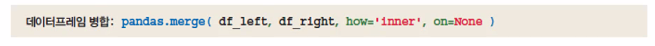

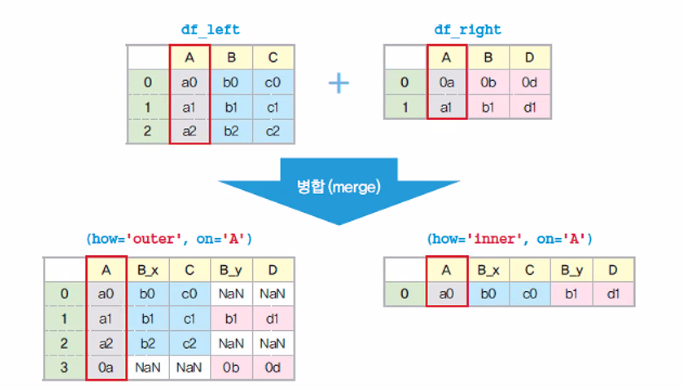

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/ Encore Prac/stock price.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/ Encore Prac/stock valuation.xlsx')

In [ ]:
df1.head(3)

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200


In [ ]:
df2.head(3)

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691


In [ ]:
# df1과 df2를 병합(교집합)
pd.merge(df1, df2)  # defalut: inner join(교집합), on='id'

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [ ]:
# df1과 df2를 'id'열을 기준으로 병합(합집합)
pd.merge(df1, df2, how='outer', on='id')  #합집합

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [ ]:
# df1을 기준으로 df1의 'stock_name'열과 df2의 'name'열을 병합
pd.merge(df1, df2, how='left', left_on = 'stock_name', right_on = 'name')  

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,130960.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500,139480.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000,145990.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500,185750.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475,204210.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [ ]:
# df2을 기준으로 df1의 'stock_name'열과 df2의 'name'열을 병합
pd.merge(df1, df2, how='right', left_on = 'stock_name', right_on = 'name')

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,130960.0,CJ E&M,58540.666667,98900.0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,NaN,NaN,NaN,NaN,136480,하림,274.166667,3551,11.489362,0.887074
2,NaN,NaN,NaN,NaN,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480.0,이마트,239230.833333,254500.0,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990.0,삼양사,82750.000000,82000.0,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,NaN,NaN,NaN,NaN,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,NaN,NaN,NaN,NaN,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750.0,종근당,40293.666667,100500.0,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210.0,모두투어리츠,3093.333333,3475.0,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,NaN,NaN,NaN,NaN,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [ ]:
#df1에서 5000원 미만인 항목과 df2 병합
pd.merge(df1[df1.price < 5000], df2)

,id,stock_name,value,price,name,eps,bps,per,pbr
0,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


### join

* df1.join(df2, how='')
* merge를 기반으로 작동방식이 유사
* 다만 join은 행 인덱스 기준 결합

In [ ]:
# 공통 index를 사전에 설정해야함
df1.set_index('id', inplace=True)
df2.set_index('id', inplace=True)

In [ ]:
df1.join(df2, how='inner')

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


# 그룹 연산

그룹연산: 특정 기준을 적용하여 몇 개의 그룹으로 분할하여 처리하는 것 
 * 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나눠서 분석하는 것도 좋은 방법
 * 데이터를 집계, 변환, 필터링에 효과적
 * 총 3단계
  * 분할 (split): 데이터를특정 조건에 의해 분할
  * 적용 (apply): 데이터를 집계, 변환, 필터링하는데 필요한 메소드 적용
  * 결합 (combine) :처리 결과를 하나로 결합

 ### groupby

* 하나의 열 기준으로 그룹화

In [4]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age', 'sex', 'class', 'fare', 'survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [5]:
# groupby로 class 열을 기준으로 분할하여 grouped 변수에 저장
grouped = df.groupby('class')
grouped

In [6]:
# calss의 unique 값 확인
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [7]:
len(grouped)

3

df.groupby("column1")["column2"].sum()
* column1: 묶음의 기준이 되는 열
* column2: 적용받는 열
* sum(): 적용받는 연산

In [ ]:
# 그룹객체 출력
for key, group in grouped:
  print(key)
  print(group.head(2))

First
    age     sex  class     fare  survived
1  38.0  female  First  71.2833         1
3  35.0  female  First  53.1000         1
Second
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
Third
    age     sex  class   fare  survived
0  22.0    male  Third  7.250         0
2  26.0  female  Third  7.925         1


In [8]:
# 그룹객체의 평균 확인
grouped.mean()

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [ ]:
# groupby로 class 열을 기준으로 분할 후, 'Third' 그룹만 출력
df.groupby('class').get_group('Third')

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
...,...,...,...,...,...
882,22.0,female,Third,10.5167,0
884,25.0,male,Third,7.0500,0
885,39.0,female,Third,29.1250,0
888,NaN,female,Third,23.4500,0


* 여러 열을 기준으로 그룹화

In [11]:
grouped_two = df.groupby(['class', 'sex'])

In [10]:
for key, group in grouped_two:
  print(key)
  print(group.head(2))

('First', 'female')
    age     sex  class     fare  survived
1  38.0  female  First  71.2833         1
3  35.0  female  First  53.1000         1
('First', 'male')
     age   sex  class     fare  survived
6   54.0  male  First  51.8625         0
23  28.0  male  First  35.5000         1
('Second', 'female')
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
('Second', 'male')
     age   sex   class  fare  survived
17   NaN  male  Second  13.0         1
20  35.0  male  Second  26.0         0
('Third', 'female')
    age     sex  class     fare  survived
2  26.0  female  Third   7.9250         1
8  27.0  female  Third  11.1333         1
('Third', 'male')
    age   sex  class  fare  survived
0  22.0  male  Third  7.25         0
4  35.0  male  Third  8.05         0


In [ ]:
grouped_two.mean()

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [ ]:
# 'Third'그룹 이면서 'female'그룹인 데이터 확인
grouped_two.get_group(('Third', 'female'))

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0
...,...,...,...,...,...
863,NaN,female,Third,69.5500,0
875,15.0,female,Third,7.2250,1
882,22.0,female,Third,10.5167,0
885,39.0,female,Third,29.1250,0


### 집계 함수

* 데이터 집계 (aggreagation)
 * mean, max, min, sum, count, size, var, std, describe, first, last 등의 집계 함수

In [12]:
# 그룹객체의 표준편차 구하기
grouped.std()

,age,fare,survived
class,,,
First,14.802856,78.380373,0.484026
Second,14.001077,13.417399,0.500623
Third,12.495398,11.778142,0.428949


In [16]:
# 그룹객체의 값들의 개수
grouped.size()  # = value_counts()

class
First     216
Second    184
Third     491
dtype: int64

In [14]:
# 그룹객체의 통계정보 확인
grouped.describe()

age                                                       fare  \
        count       mean        std   min   25%   50%   75%   max  count   
class                                                                      
First   186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0  216.0   
Second  173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0  184.0   
Third   355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0  491.0   

                   ...                 survived                                \
             mean  ...   75%       max    count      mean       std  min  25%   
class              ...                                                          
First   84.154687  ...  93.5  512.3292    216.0  0.629630  0.484026  0.0  0.0   
Second  20.662183  ...  26.0   73.5000    184.0  0.472826  0.500623  0.0  0.0   
Third   13.675550  ...  15.5   69.5500    491.0  0.242363  0.428949  0.0  0.0   

                       
        50%  75%  max  
class                  
First   1.0  1.0  1.0  
Second  0.0  1.0  1.0  
Third   0.0  0.0  1.0  

[3 rows x 24 columns]

In [15]:
# 그룹객체의 fare열의 표준편차
grouped.fare.std()

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

### agg

* group객체.agg(매핑함수)
 * 집계 연산을 처리하는 사용자 정의 함수를 그룹 객체에 적용시 agg 메소드 사용

In [17]:
# 사용자 함수 정의
def min_max(x):
  return max(x) - min(x)

In [19]:
# 그룹객체에 적용
grouped.agg(min_max)

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


* group객체.agg([함수1, 함수2, 함수3,...])
* group객체.agg({'열1': 함수1, '열2' : 함수2,....}]

In [20]:
# 그룹객체에 여러 함수 적용
grouped.agg([min, max])

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [21]:
# 열마다 다른 함수 적용
grouped.agg({'fare': ['min', 'max'], 'age': 'mean'})

fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620

### transform

* group객체.transform(매핑함수)
 * agg는 각 그룹별 데이터에 함수를 구분 적용하고 그룹별로 결과를 집계
 * transform은 그륩별 각 원소에 함수를 적용하지만 그룹별 집계 대신 각 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과 반환


In [22]:
# z-score를 계산하는 사용자 함수 정의
def zscore(x):
  return ((x - x.mean()) / x.std())

In [23]:
grouped.age.transform(zscore)  #그룹별로 적용되는 게 아니라 전체 데이터에 적용 #데이터 하나하나에 적용되는 함수

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [24]:
grouped.agg([min, max])  # 그룹의 값을 가지고 계산하는 함수

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

### filter

* group객체.filter(조건식 함수)
 * 그룹 객체에 filter를 적용할 때 조건식을 가진 함수를 전달하면 조건의 참인 그룹만을 남긴다 

In [ ]:
# 그룹객체에서 데이터 개수가 200개 이상인 그룹만 반환
grouped.filter(lambda x : len(x) >= 200)   # 'First', 'Third' 그룹만 반환

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
885,39.0,female,Third,29.1250,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [ ]:
# 그룹객체에서 age열의 데이터 평균이 30보다 작은 그룹만 추출하여 데이터프레임으로 반환
grouped.filter(lambda x: x.age.mean() < 30)

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
...,...,...,...,...,...
884,25.0,male,Third,7.0500,0
885,39.0,female,Third,29.1250,0
886,27.0,male,Second,13.0000,0
888,NaN,female,Third,23.4500,0


### apply

* 그룹객체.apply(매핑함수)
 * apply 는 개별 원소를 특정 함수에 일대일 매칭. 그룹 객체에도 적용 가능

In [34]:
# 그룹객체의 그룹별 요약 통계정보 집계
grouped.apply(lambda x: x.describe()).head(10)

age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826

In [26]:
# zscore를 계산하는 사용자 함수 적용
grouped.age.apply(zscore) 

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64

In [27]:
# 필터링 : age열의 데이터 평균이 30보다 작은 그룹만 필터링하여 출력
grouped.apply(lambda x: x.age.mean() < 30)  
# 주의!! bool 값만 출력 => 정보만 확인 가능

class
First     False
Second     True
Third      True
dtype: bool

In [36]:
# apply로 필터링한 데이터 출력 과정

# 필터링한 그룹객체 변수로 저장
age_ft = grouped.apply(lambda x: x.age.mean() < 30)
age_ft.index

CategoricalIndex(['First', 'Second', 'Third'], categories=['First', 'Second', 'Third'], ordered=False, dtype='category', name='class')

In [30]:
# 변수로 저장한 그룹 객체 출력
for i in age_ft.index:
  if age_ft[i] == True:
    print(grouped.get_group(i))

      age     sex   class     fare  survived
9    14.0  female  Second  30.0708         1
15   55.0  female  Second  16.0000         1
17    NaN    male  Second  13.0000         1
20   35.0    male  Second  26.0000         0
21   34.0    male  Second  13.0000         1
..    ...     ...     ...      ...       ...
866  27.0  female  Second  13.8583         1
874  28.0  female  Second  24.0000         1
880  25.0  female  Second  26.0000         1
883  28.0    male  Second  10.5000         0
886  27.0    male  Second  13.0000         0

[184 rows x 5 columns]
      age     sex  class     fare  survived
0    22.0    male  Third   7.2500         0
2    26.0  female  Third   7.9250         1
4    35.0    male  Third   8.0500         0
5     NaN    male  Third   8.4583         0
7     2.0    male  Third  21.0750         0
..    ...     ...    ...      ...       ...
882  22.0  female  Third  10.5167         0
884  25.0    male  Third   7.0500         0
885  39.0  female  Third  29.1250       

In [37]:
# vs filter
# filter 사용시 바로 값 출력 가능
grouped.filter(lambda x: x.age.mean() < 30) 

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
...,...,...,...,...,...
884,25.0,male,Third,7.0500,0
885,39.0,female,Third,29.1250,0
886,27.0,male,Second,13.0000,0
888,NaN,female,Third,23.4500,0


# 피벗

* 판다스 pivot_table() 
* 행인덱스, 열인덱스, 데이터값, 데이터집계함수


In [48]:
 df = sns.load_dataset('titanic')
 df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
# 데이터 프레임 -> 피벗 테이블
pd.pivot_table(df,             # 피벗할 데이터 프레임
               values='age',   # 데이터로 사용할 들어갈 열 
               index='class',  # 행 위치에 들어갈 열
               columns='sex',  # 열 위치에 들어갈 열
               aggfunc='mean') # 데이터 집계 함수

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [45]:
pd.pivot_table(data=df,                 # 피벗할 데이터 프레임
               values='survived',       # 데이터로 사용할 열
               index='class',           # 행 위치에 들어갈 열
               columns='sex',           # 열 위치에 들어갈 열
               aggfunc=['mean', 'sum']) # 데이터 집계 함수

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [46]:
pd.pivot_table(df,            
               values=['age', 'fare'], 
               index=['class', 'sex'],
               columns='survived', 
               aggfunc=['mean', 'max'])

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

# 멀티 인덱스

In [53]:
# 타이타닉 데이터에서 'calss', 'sex' 열에 대해 그룹객체 생성
grouped = df.groupby(['class', 'sex'])
# 평균으로 집계
gdf = grouped.mean()  #멀티 인덱스 상태
gdf

survived  pclass        age     sibsp     parch        fare  \
class  sex                                                                   
First  female  0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       male    0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
Second female  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       male    0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
Third  female  0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
       male    0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
class  sex                           
First  female    0.000000  0.361702  
       male      0.975410  0.614754  
Second female    0.000000  0.421053  
       male      0.916667  0.666667  
Third  female    0.000000  0.416667  
       male      0.919308  0.760807

### 멀티 인덱스의 인덱싱

In [52]:
# 'class'열의 'First'행만 인덱싱
gdf.loc['First']

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.968085,1.0,34.611765,0.553191,0.457447,106.125798,0.00000,0.361702
male,0.368852,1.0,41.281386,0.311475,0.278689,67.226127,0.97541,0.614754


In [57]:
# 'First' 행의 'female' 행 인덱싱
gdf.loc[('First', 'female')]  # index를 차례로 찾아들어감

survived        0.968085
pclass          1.000000
age            34.611765
sibsp           0.553191
parch           0.457447
fare          106.125798
adult_male      0.000000
alone           0.361702
Name: (First, female), dtype: float64

### 멀티 인덱서(.xs)

In [58]:
# 그룹 범주와 상관없이 소 인덱스를 따로 추출 ( sex 열을 기준으로 male 추출)
gdf.xs('male', level='sex')  

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.368852,1.0,41.281386,0.311475,0.278689,67.226127,0.975410,0.614754
Second,0.157407,2.0,30.740707,0.342593,0.222222,19.741782,0.916667,0.666667
Third,0.135447,3.0,26.507589,0.498559,0.224784,12.661633,0.919308,0.760807


* 멀티 인덱스 해제

In [62]:
# 멀티인덱스 해제
gdf.reset_index()

,class,sex,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,First,female,0.968085,1.0,34.611765,0.553191,0.457447,106.125798,0.000000,0.361702
1,First,male,0.368852,1.0,41.281386,0.311475,0.278689,67.226127,0.975410,0.614754
2,Second,female,0.921053,2.0,28.722973,0.486842,0.605263,21.970121,0.000000,0.421053
3,Second,male,0.157407,2.0,30.740707,0.342593,0.222222,19.741782,0.916667,0.666667
4,Third,female,0.500000,3.0,21.750000,0.895833,0.798611,16.118810,0.000000,0.416667
5,Third,male,0.135447,3.0,26.507589,0.498559,0.224784,12.661633,0.919308,0.760807


In [61]:
# 열이 멀티인덱스인 경우
gdf2 = df.groupby('class').agg(['mean','max'])[['age','fare']]
gdf2

age             fare          
             mean   max       mean       max
class                                       
First   38.233441  80.0  84.154687  512.3292
Second  29.877630  70.0  20.662183   73.5000
Third   25.140620  74.0  13.675550   69.5500

In [63]:
gdf2.columns = ['age_mean', 'age_max', 'fare_mean','fare_max']
gdf2.head()

,age_mean,age_max,fare_mean,fare_max
class,,,,
First,38.233441,80.0,84.154687,512.3292
Second,29.877630,70.0,20.662183,73.5000
Third,25.140620,74.0,13.675550,69.5500


* 피벗테이블의 멀티인덱싱 추가 응용

In [64]:
# 피벗 테이블 생성
pdf = pd.pivot_table(df,
                     index = ['class','sex'],
                     columns = 'survived',
                     values = ['age','fare'],
                     aggfunc = ['mean','max'])
pdf

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [65]:
# 'First' 그룹 인덱싱
pdf.xs('First')

mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292

In [66]:
# 'sex'열의 'male'행 인덱싱
pdf.xs('male', level='sex')

mean                                    max                \
                age                  fare              age          fare   
survived          0          1          0          1     0     1       0   
class                                                                      
First     44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third     27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                    
                    
survived         1  
class               
First     512.3292  
Second     39.0000  
Third      56.4958

In [67]:
# 'class'열의 'First'행, 'sex'열의 'female'행 인덱싱
pdf.xs(('First','female'), level=['class','sex'])

mean                                      max        \
                    age                   fare               age         
survived              0          1           0           1     0     1   
class sex                                                                
First female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   

                                
                fare            
survived           0         1  
class sex                       
First female  151.55  512.3292

In [72]:
# 열의 멀티인덱싱 (axis=1)
# 'mean'열만 인덱싱
pdf.xs('mean', axis=1)

age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696

In [73]:
# 'mean'열의 'age'열 인덱싱
pdf.xs(('mean','age'), axis=1)

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211